In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob

In [11]:
jfo_ALFOSC = ascii.read('2020jfo-ALFOSC-2020-05-06.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_12 = ascii.read('2020jfo-FLOYDS-N-2020-05-12.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_06_13 = ascii.read('2020jfo-FLOYDS-N-2020-06-13.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_06_26 = ascii.read('2020jfo-FLOYDS-N-2020-06-26.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_07 = ascii.read('2020jfo-FLOYDS-S-2020-05-07.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_08 = ascii.read('2020jfo-FLOYDS-S-2020-05-08.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_10 = ascii.read('2020jfo-FLOYDS-S-2020-05-10.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_16 = ascii.read('2020jfo-FLOYDS-S-2020-05-16.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_19 = ascii.read('2020jfo-FLOYDS-S-2020-05-19.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_24 = ascii.read('2020jfo-FLOYDS-S-2020-05-24.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_27 = ascii.read('2020jfo-FLOYDS-S-2020-05-27.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_05_28 = ascii.read('2020jfo-FLOYDS-S-2020-05-28.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_FLOYDS_06_05 = ascii.read('2020jfo-FLOYDS-S-2020-06-05.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_KAST_05_23 = ascii.read('2020jfo-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_KAST_07_27 = ascii.read('2020jfo-KAST-2020-07-27.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_LRIS_02_12 = ascii.read('2020jfo-LRIS-2021-02-12.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_06 = ascii.read('2020jfo-Unknown-2020-05-06.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_07 = ascii.read('2020jfo-Unknown-2020-05-07.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_11 = ascii.read('2020jfo-Unknown-2020-05-11.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_12 = ascii.read('2020jfo-Unknown-2020-05-12.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_14 = ascii.read('2020jfo-Unknown-2020-05-14.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_17 = ascii.read('2020jfo-Unknown-2020-05-17.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_19 = ascii.read('2020jfo-Unknown-2020-05-19.csv', format = 'csv', header_start = 18, data_start = 19)
jfo_UNKNOWN_05_20 = ascii.read('2020jfo-Unknown-2020-05-20.csv', format = 'csv', header_start = 18, data_start = 19)


wavelength   flux  fluxerr
---------- ------- -------
    4000.0 2488.14   -99.0
  4003.171 2977.81   -99.0
  4006.342 2917.77   -99.0
  4009.514 3119.47   -99.0
  4012.685 2972.96   -99.0
  4015.856 2273.48   -99.0
  4019.027 2313.64   -99.0
  4022.199 3079.72   -99.0
   4025.37 2923.69   -99.0
  4028.541 3443.04   -99.0
       ...     ...     ...
  8468.287 1363.88   -99.0
  8471.459 1439.15   -99.0
   8474.63 1336.81   -99.0
  8477.801 1403.81   -99.0
  8480.972 1520.29   -99.0
  8484.144 1664.98   -99.0
  8487.315 1261.63   -99.0
  8490.486 941.411   -99.0
  8493.657 1122.72   -99.0
  8496.829 1475.53   -99.0
    8500.0 1897.51   -99.0
Length = 1420 rows
wavelength    flux   fluxerr
---------- --------- -------
  3600.245  0.410445   -99.0
  3602.775  0.327158   -99.0
  3605.305  0.434278   -99.0
  3607.836  0.428725   -99.0
  3610.366  0.348567   -99.0
  3612.896  0.333895   -99.0
  3615.426  0.409384   -99.0
  3617.956  0.375119   -99.0
  3620.487   0.43725   -99.0
  3623.017  0.

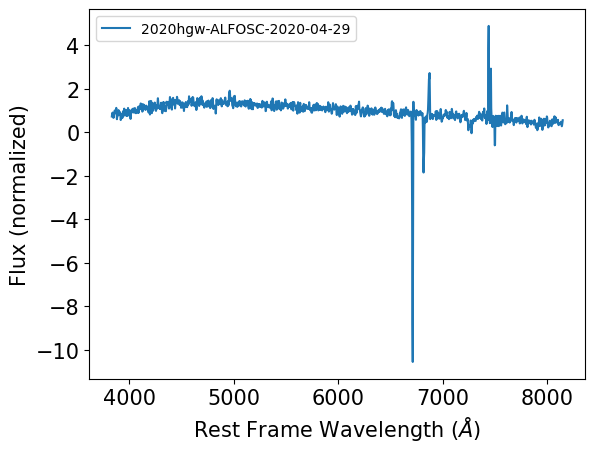

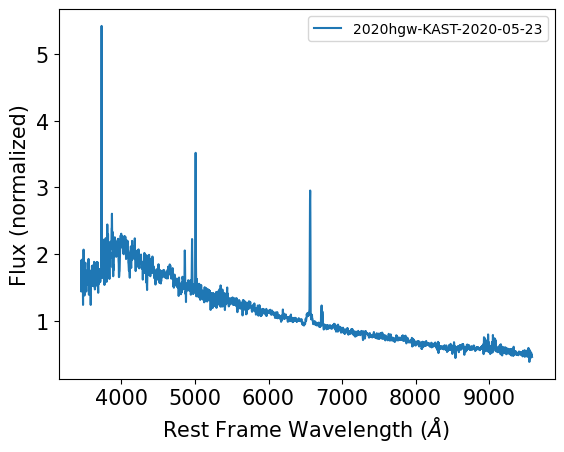

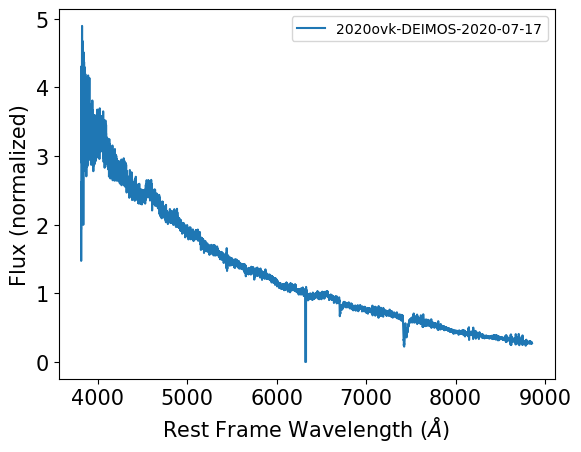

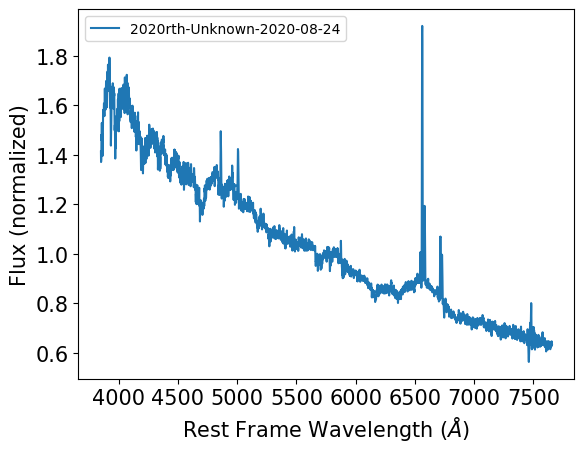

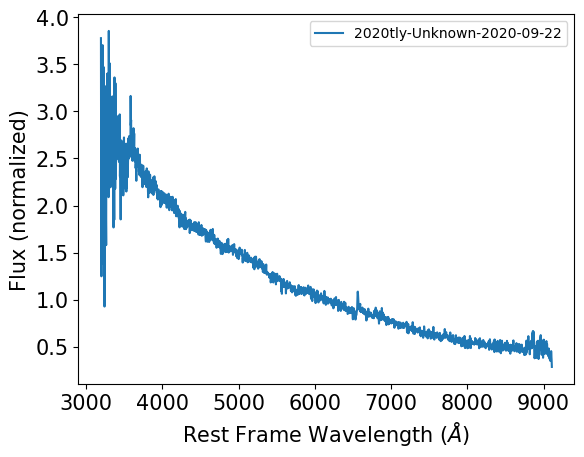

In [48]:
redshifts = [0.043, 0.005, 0.025, 0.0184, 0.058] 
spectra = glob.glob("*.csv")
for idx, file in enumerate(spectra):
    if 'jfo' in file:
        continue 
    object = ascii.read(file, format = 'csv', header_start = 18, data_start = 19)
    print(object)
    wavelength = object['wavelength']
    flux = object['flux'] 
    if 'hgw' in file:
        z = redshifts[0]
    elif 'jfo' in file:
        z = redshifts[1] 
    elif 'ovk' in file:
        z = redshifts[2] 
    elif 'rth' in file:
        z = redshifts[3] 
    else:
        z = redshifts[4]
    label = file.split('.')[0]
    plt.figure(idx)
    plt.plot(wavelength / ( 1 + z), flux / np.median(flux), label = label)
    plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
    plt.ylabel('Flux (normalized)', fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.legend()

        


In [58]:
hgw_ALFOSC = ascii.read('2020hgw-ALFOSC-2020-04-29.csv', format = 'csv', header_start = 18, data_start = 19)
hgw_KAST = ascii.read('2020hgw-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
ovk_DEIMOS = ascii.read('2020ovk-DEIMOS-2020-07-17.csv', format = 'csv', header_start = 18, data_start = 19)
rth = ascii.read('2020rth-Unknown-2020-08-24.csv', format = 'csv', header_start = 18, data_start = 19)
tly = ascii.read('2020tly-Unknown-2020-09-22.csv', format = 'csv', header_start = 18, data_start = 19)

NOW WE START NA ID ANALYSIS AYOOOOOOOOOOO

FOR NOW IMA DO IT INVIVIDUALLY BUT I WILL ONE DAY MAKE IT A FUNCTION 

In [63]:
na_rest_wavelength = 5892

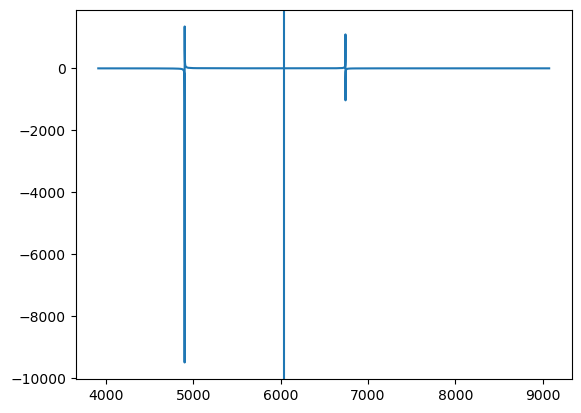

In [77]:
# gonna start with ovk since i don't have to stack anything 
ovk_centroid = na_rest_wavelength * (1 + redshifts[2])
ovk_DEIMOS_wavelength = ovk_DEIMOS['wavelength']
ovk_DEIMOS_flux = ovk_DEIMOS['flux'] 
lower_mask_ovk = ovk_centroid - 20
upper_mask_ovk = ovk_centroid + 20
mask_ovk = (ovk_DEIMOS_wavelength > lower_mask_ovk) & (ovk_DEIMOS_wavelength < upper_mask_ovk)
continuum_ovk = ((ovk_DEIMOS_wavelength > (lower_mask_ovk - 150))&(ovk_DEIMOS_wavelength < (lower_mask_ovk - 10))|(ovk_DEIMOS_wavelength > (upper_mask_ovk + 10))&(ovk_DEIMOS_wavelength < (upper_mask_ovk + 150)))
coeff_ovk = np.polyfit(ovk_DEIMOS_wavelength[continuum_ovk], ovk_DEIMOS_flux[continuum_ovk], 2)
p_ovk = np.poly1d(coeff_ovk)
ovk_flux_norm = ovk_DEIMOS_flux / p_ovk(ovk_DEIMOS_wavelength)
plt.plot(ovk_DEIMOS_wavelength, ovk_flux_norm, label = '2020ovk-DEIMOS-2020-07-17')
plt.axvline(ovk_centroid)



In [75]:
ovk_centroid

6039.299999999999